# <CENTER><U>**`PRINCIPAL COMPONENT ANALYSIS (PCA)`**</U></CENTER>




In [71]:
#Import Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
## Load MNIST Data (train.csv)
d0 =pd.read_csv('train.csv.zip') 


In [28]:
d0.shape

(42000, 785)

In [14]:
# print first five rows of d0.
 
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **`Data Dict:`**<br>
`The data files train.csv contain gray-scale images of hand-drawn digits, from zero through nine.`

`Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.`
`Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.`

`The training data set has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.`

In [15]:
# save the labels into a variable l.
l = d0['label']


In [17]:
# Drop the label feature from d0 and store the pixel data in d.
d = d0.drop('label',axis=1)


In [26]:
#print shape of pixel and label data
print(d.shape)
print(l.shape)



(42000, 784)
(42000,)


In [25]:
idx = 1
# print label value for above index
print(l[idx])


0


#### display or plot above label.




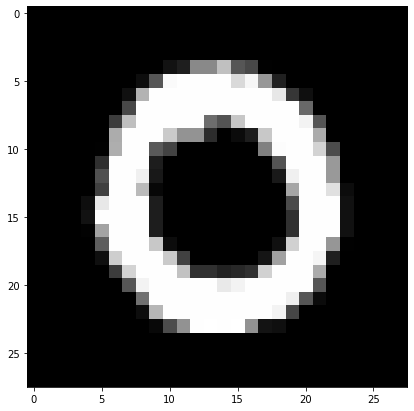

In [33]:
plt.figure(figsize=(7,7))

# reshape from 1d to 2d pixel array ( prefer 28 X 28)
grid_data= d.loc[idx].values.reshape(28,28)


#plot above grid image with cmap as gray and interpoltion as none

plt.imshow(grid_data,cmap='gray')

#display plot
plt.show()



#  **`2D Visualization using PCA`** 



In [38]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)            #labels with 15k data points
data = d.head(15000)              #data with 15k data points





### **`Data-preprocessing: Standardizing the data`**




In [39]:
# import standard scalar
from sklearn.preprocessing import StandardScaler


#fit transform data
standardized_data = StandardScaler().fit_transform(data)


#print shape of standardized_data

print(standardized_data.shape)


(15000, 784)


### **`find the co-variance matrix which is : A^T * A`**

Finding the covariance matrix of the dataset by multiplying the the matrix of features by its transpose. It is a measure of how much each of the dimensions vary from the mean with respect to each other.

The covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions, e.g., relationship between the height and weight of students. 

A positive value of covariance indicates that both the dimensions are directly proportional to each other, where if one dimension increases the other dimension increases accordingly.

A negative value of covariance indicates that both the dimensions are indirectly proportional to each other, where if one dimension increases then other dimension decreases accordingly.


If in case the covariance is zero, then the two dimensions are independent of each other.

In [43]:

sample_data = standardized_data

#use matrix multiplication using numpy to find covariance matrix
covar_matrix = np.matmul(sample_data.T,sample_data)



#print shape of covar_matrix
print('Shape of covar_matrix :', covar_matrix.shape)



Shape of covar_matrix : (784, 784)


### **`Computing Eigenvectors and Eigenvalues`**


The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

The eigenvectors and eigenvalues of the covariance matrix will give the principal components and a vector that we can use to project high-dimensional inputs to the lower-dimensional subspace.

In [97]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
from scipy.linalg import eigh

 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix,eigvals=(782,783))

print('Shape of eigen vectors=',vectors.shape)


# converting the eigen vectors into (2,d) shape for easyness of further computations

vectors=vectors.T
print('Updated shape of eigen vectors=',vectors.shape)



# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors= (2, 784)
Updated shape of eigen vectors= (2, 784)


In [49]:
# projecting the original data sample on the plane 
#formed by multiplication of two principal eigen vectors with transposed sample_data

import matplotlib.pyplot as plt

# multiplication of two principal eigen vectors with transposed sample_data to get 2d projected data
new_coordinates = np.matmul(vectors,sample_data.T)

# print resultant new data points

print(' resultanat new data points' ,vectors.shape , 'X', sample_data.T.shape,  '=',  new_coordinates.shape)

 resultanat new data points (2, 784) X (784, 15000) = (2, 15000)


In [91]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T


# creating a new data frame for ploting the labeled points.
dataframe =pd.DataFrame(data=new_coordinates,columns=('1st_principal','2nd_principal','labels')) 

# print head
dataframe.head()



,1st_principal,2nd_principal,labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


<AxesSubplot:xlabel='1st_principal', ylabel='2nd_principal'>

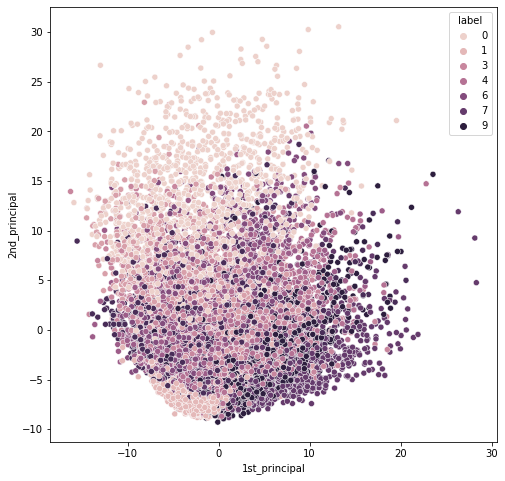

In [96]:
# ploting the 2d data points with seaborn
plt.figure(figsize=(8,8))
sns.scatterplot(x=dataframe['1st_principal'],y=dataframe['2nd_principal'],hue=labels)




### **`PCA using Scikit-Learn`**


In [50]:
# import decomposition

from sklearn.decomposition import PCA
# initializing the pca
pca = PCA()



#### configuring the parameteres

In [63]:
# the number of components = 2
pca.n_components = 2

# fit transform sample data using pca 
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print('shape of pca_reduced.shape = ',pca_data.shape)




shape of pca_reduced.shape =  (15000, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

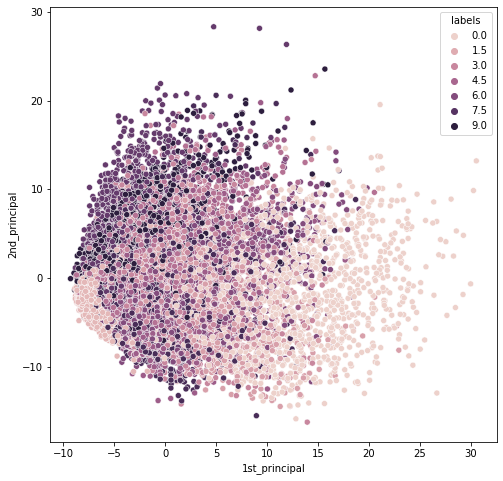

In [79]:
# attaching the label for each 2-d data point (Hint: Use np.vstack)
pca_data =np.vstack((pca_data.T,labels)).T


# creating a new data fram which help us in ploting the result data
pca_df =pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels')) 

plt.figure(figsize=(8,8))
sns.scatterplot(x=pca_df['1st_principal'],y=pca_df['2nd_principal'],hue=pca_df['labels'])
plt.show

### **`PCA for dimensionality reduction (not for visualization)`**

The distribution of explained variance for each principal component gives a sense of how much information will be represented and how much lost when the full, 64-dimensional input is reduced using a principal component model (i.e., a model that utilizes only the first  N  principal components).

<function matplotlib.pyplot.show(close=None, block=None)>

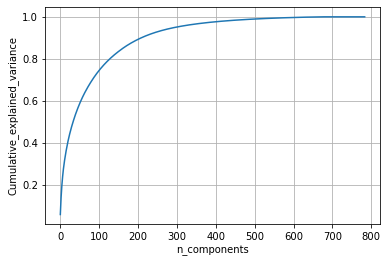

In [84]:

# the number of components = 784
pca.n_components = 784


# fit transform sample data using pca 
pca_data = pca.fit_transform(standardized_data)



#calculating percentage of variance explained in the data
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)



#cumulative sum of the percentage_var_explained
cum_var_explained =np.cumsum(percentage_var_explained) 


# Plot the PCA spectrum
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show





From above it can be observed that if we take 200-dimensions, approx. 90% of variance is expalined. 





